In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [50]:
class airbnb_city:
    
    def __init__(self, csv):
        
        self.csv = csv
                
        self.df_city = pd.read_csv(self.csv)
        
        print("Instance created!")
        
    def clean_columns(self):
        
        # Take only the relevant columns in the dataframe
        
        l_relevant_columns = ["host_is_superhost","neighbourhood_cleansed","neighbourhood_group_cleansed","property_type","room_type","accommodates","bathrooms_text","beds","price","minimum_nights","maximum_nights","availability_30","availability_365","number_of_reviews","instant_bookable"]

        self.df_city = self.df_city[l_relevant_columns]
        
        self.df_city["bathrooms_text"].replace(np.nan, "?", inplace = True)
        
        # Get numbers out of bathroom_text columns
        
        l_nums = [re.findall(r'\d+',i) for i in self.df_city["bathrooms_text"].values]

        l_nums_completed = []

        for i in l_nums:

            if len(i) > 1:

                l_nums_completed.append('.'.join(i))

            elif len(i) == 0:

                l_nums_completed.append('0')

            else:

                l_nums_completed.append(i[0])

        # Separate categories from bathroom_text
        
        l_category = []

        for i in self.df_city["bathrooms_text"].values:

            if "shared" in i:

                l_category.append("Shared")

            elif "private" in i:

                l_category.append("Private")

            else:

                l_category.append("Unknown")
                
        # Create two different columns replacing bathroom_text
        
        self.df_city.drop("bathrooms_text", axis = 1, inplace = True)
                
        self.df_city["num_of_baths"] = l_nums_completed
        
        self.df_city["bath_category"] = l_category

        # Column["prices"]

        # Getting rid of "$"
        self.df_city["price"] = [i.strip("$") for i in self.df_city["price"] .values]

        # Replacing ","
        self.df_city["price"]  = self.df_city["price"] .apply(lambda x: x.replace(',', '') if pd.notnull(x) else x)

        # Cast to float
        self.df_city["price"]  = self.df_city["price"] .apply(lambda x: float(x) if pd.notnull(x) else x)
        
        print("Dataframe sucessfully created!")

        
    def return_df(self):
    
        return self.df_city
    
    def display_df(self):
    
        display(self.df_city)

In [102]:
madrid = airbnb_city("listings_detailed.csv")

Instance created!


In [103]:
madrid.clean_columns()

Dataframe sucessfully created!


In [104]:
madrid.display_df()

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,instant_bookable,num_of_baths,bath_category
0,t,Hispanoamérica,Chamartín,Private room in apartment,Private room,2,1.0,60.0,1,1125,30,180,78,f,1,Shared
1,f,Cármenes,Latina,Private room in apartment,Private room,1,1.0,31.0,4,40,29,364,33,f,1,Unknown
2,f,Legazpi,Arganzuela,Entire apartment,Entire home/apt,6,5.0,50.0,15,730,1,1,0,f,2,Unknown
3,f,Universidad,Centro,Entire apartment,Entire home/apt,3,1.0,92.0,5,730,12,72,10,t,1,Unknown
4,f,Legazpi,Arganzuela,Private room in house,Private room,1,1.0,26.0,2,1125,30,365,149,f,1,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,f,Embajadores,Centro,Private room in apartment,Private room,1,1.0,23.0,30,1125,14,349,0,f,2,Shared
19614,f,Gaztambide,Chamberí,Private room in apartment,Private room,1,1.0,21.0,30,1125,15,350,0,f,3.5,Shared
19615,f,Arapiles,Chamberí,Private room in apartment,Private room,1,1.0,22.0,7,1125,29,364,0,f,3,Unknown
19616,f,Guindalera,Salamanca,Private room in apartment,Private room,1,1.0,19.0,30,1125,14,349,0,f,3,Shared


In [105]:
df = madrid.return_df()

In [106]:
df

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,instant_bookable,num_of_baths,bath_category
0,t,Hispanoamérica,Chamartín,Private room in apartment,Private room,2,1.0,60.0,1,1125,30,180,78,f,1,Shared
1,f,Cármenes,Latina,Private room in apartment,Private room,1,1.0,31.0,4,40,29,364,33,f,1,Unknown
2,f,Legazpi,Arganzuela,Entire apartment,Entire home/apt,6,5.0,50.0,15,730,1,1,0,f,2,Unknown
3,f,Universidad,Centro,Entire apartment,Entire home/apt,3,1.0,92.0,5,730,12,72,10,t,1,Unknown
4,f,Legazpi,Arganzuela,Private room in house,Private room,1,1.0,26.0,2,1125,30,365,149,f,1,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19613,f,Embajadores,Centro,Private room in apartment,Private room,1,1.0,23.0,30,1125,14,349,0,f,2,Shared
19614,f,Gaztambide,Chamberí,Private room in apartment,Private room,1,1.0,21.0,30,1125,15,350,0,f,3.5,Shared
19615,f,Arapiles,Chamberí,Private room in apartment,Private room,1,1.0,22.0,7,1125,29,364,0,f,3,Unknown
19616,f,Guindalera,Salamanca,Private room in apartment,Private room,1,1.0,19.0,30,1125,14,349,0,f,3,Shared


In [107]:
df.isnull().sum()

host_is_superhost               527
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
property_type                     0
room_type                         0
accommodates                      0
beds                            400
price                             0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_365                  0
number_of_reviews                 0
instant_bookable                  0
num_of_baths                      0
bath_category                     0
dtype: int64

In [108]:
df.dropna(inplace=True)

In [109]:
df["host_is_superhost"] = pd.get_dummies(data = df["host_is_superhost"], drop_first=True)
df["host_is_superhost"]

0        1
1        0
2        0
3        0
4        0
        ..
19612    0
19613    0
19614    0
19615    0
19616    0
Name: host_is_superhost, Length: 18700, dtype: uint8

In [130]:
df["instant_bookable"] = pd.get_dummies(data = df["instant_bookable"], drop_first=True)
df["instant_bookable"]

0        0
1        0
2        0
3        1
4        0
        ..
19612    1
19613    0
19614    0
19615    0
19616    0
Name: instant_bookable, Length: 18700, dtype: uint8

In [110]:
df_room_type = pd.get_dummies(data = df["room_type"], drop_first=True)

In [111]:
df_room_type

,Hotel room,Private room,Shared room
0,0,1,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
19612,0,0,0
19613,0,1,0
19614,0,1,0
19615,0,1,0


In [112]:
df_bath_category = pd.get_dummies(data = df["bath_category"], drop_first=True)

In [113]:
df_bath_category = df_bath_category.rename(columns={'Shared': 'shared_bath', 'Unknown': 'unknoun_bath'})


In [114]:
df_bath_category

,shared_bath,unknoun_bath
0,1,0
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
19612,0,1
19613,1,0
19614,1,0
19615,0,1


<AxesSubplot:xlabel='price', ylabel='Density'>

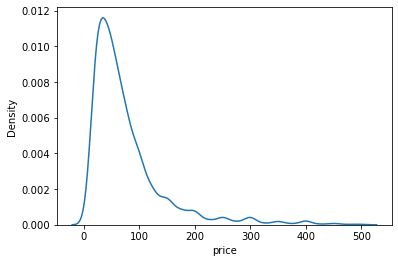

In [115]:
sns.kdeplot(df["price"][df["price"]<500])

In [116]:
from sklearn.preprocessing import LabelEncoder



# Inicializamos un objeto LabelEncoder()
neighbourhood_labelEncoding = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
neighbourhood_labelEncoding.fit(df["neighbourhood_cleansed"].values)

# Transformamos la columna
neighbourhood = neighbourhood_labelEncoding.transform(df["neighbourhood_cleansed"].values)

neighbourhood

# El resultado es la columna cambiada a numeros.





array([60, 44, 67, ..., 56, 13, 58])

In [117]:
df["neighbourhood_cleansed"] = neighbourhood

In [118]:
# Inicializamos un objeto LabelEncoder()
property_type_labelEncoding = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
property_type_labelEncoding.fit(df["property_type"].values)

# Transformamos la columna
property_type = property_type_labelEncoding.transform(df["property_type"].values)

property_type

# El resultado es la columna cambiada a numeros.


array([23, 23,  4, ..., 23, 23, 23])

In [119]:
df["property_type"] = property_type

In [120]:
df

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,instant_bookable,num_of_baths,bath_category
0,1,60,Chamartín,23,Private room,2,1.0,60.0,1,1125,30,180,78,f,1,Shared
1,0,44,Latina,23,Private room,1,1.0,31.0,4,40,29,364,33,f,1,Unknown
2,0,67,Arganzuela,4,Entire home/apt,6,5.0,50.0,15,730,1,1,0,f,2,Unknown
3,0,117,Centro,4,Entire home/apt,3,1.0,92.0,5,730,12,72,10,t,1,Unknown
4,0,67,Arganzuela,38,Private room,1,1.0,26.0,2,1125,30,365,149,f,1,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,0,98,Latina,4,Entire home/apt,2,2.0,40.0,30,1125,30,365,0,t,1,Unknown
19613,0,50,Centro,23,Private room,1,1.0,23.0,30,1125,14,349,0,f,2,Shared
19614,0,56,Chamberí,23,Private room,1,1.0,21.0,30,1125,15,350,0,f,3.5,Shared
19615,0,13,Chamberí,23,Private room,1,1.0,22.0,7,1125,29,364,0,f,3,Unknown


In [124]:
df = pd.concat([df, df_bath_category], axis = 1)

In [126]:
df = pd.concat([df, df_room_type], axis = 1)

In [127]:
df.drop("room_type", axis = 1, inplace = True)

In [128]:
df.drop("bath_category", axis = 1, inplace = True)

In [142]:
df

,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,accommodates,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,instant_bookable,num_of_baths,shared_bath,unknoun_bath,Hotel room,Private room,Shared room
0,1,60,4,23,2,1.0,60.0,1,1125,30,180,78,0,1,1,0,0,1,0
1,0,44,9,23,1,1.0,31.0,4,40,29,364,33,0,1,0,1,0,1,0
2,0,67,0,4,6,5.0,50.0,15,730,1,1,0,0,2,0,1,0,0,0
3,0,117,3,4,3,1.0,92.0,5,730,12,72,10,1,1,0,1,0,0,0
4,0,67,0,38,1,1.0,26.0,2,1125,30,365,149,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19612,0,98,9,4,2,2.0,40.0,30,1125,30,365,0,1,1,0,1,0,0,0
19613,0,50,3,23,1,1.0,23.0,30,1125,14,349,0,0,2,1,0,0,1,0
19614,0,56,5,23,1,1.0,21.0,30,1125,15,350,0,0,3.5,1,0,0,1,0
19615,0,13,5,23,1,1.0,22.0,7,1125,29,364,0,0,3,0,1,0,1,0


In [138]:
# Inicializamos un objeto LabelEncoder()
neighbourhood_group_cleansed_labelEncoding = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
neighbourhood_group_cleansed_labelEncoding.fit(df["neighbourhood_group_cleansed"].values)

# Transformamos la columna
neighbourhood_group_cleansed = neighbourhood_group_cleansed_labelEncoding.transform(df["neighbourhood_group_cleansed"].values)

neighbourhood_group_cleansed

# El resultado es la columna cambiada a numeros.

array([ 4,  9,  0, ...,  5,  5, 14])

In [140]:
df["neighbourhood_group_cleansed"] = neighbourhood_group_cleansed